# Generate dataset example

This notebook shows how to run the generate_dataset package in a notebook.

Import relevant python packages:

In [4]:
import matplotlib.pyplot as plt
import galsim
import pickle
import utils.generate_atmosphere as a
import numpy as np

In [2]:
folder = '/home/guillemmh/fob-simulation/policy/'

# Some settings here from Vera C. Rubin Observatory.
wavelength_dict = dict(
    u=365.49,
    g=480.03,
    r=622.20,
    i=754.06,
    z=868.21,
    y=991.66
)

observation = {
    'boresight': galsim.CelestialCoord(
        30*galsim.degrees, 10*galsim.degrees
    ),
    'zenith': 30*galsim.degrees,
    'airmass': 1.1547,
    'rotTelPos': 0.0*galsim.degrees,  # zenith measured CCW from up
    'rotSkyPos': 0.0*galsim.degrees,  # N measured CCW from up
    'rawSeeing': 0.7*galsim.arcsec,
    'band': 'i',
    'exptime': 30.0,
    'temperature': 293.15,  # K
    'pressure': 69.328,  # kPa
    'H2O_pressure': 1.067,  # kPa
}

# Some atmospheric settings from Vera C. Rubin Observatory.
atmSettings = {
    'kcrit': 0.2,
    'screen_size': 819.2,
    'screen_scale': 0.1,
    'nproc': 6,
}

# Get the wavelength.
wavelength = wavelength_dict[observation['band']]

# Set the random number generator.
rng = galsim.BaseDeviate()

# Generate the atmosphere model.
atmosphere = a.generate_atmosphere(
    atmSettings, 
    wavelength, 
    observation, 
    rng
)

# Generate the truncated atmosphere model.
truncated_atm = a.get_atm(
    atmosphere,
    wavelength,
    kcrit = atmSettings['kcrit'],
    nproc = atmSettings['nproc'],
    truncate=False,
)

# Save the truncated atmosphere model.
with open(folder + "truncated_atm.pkl", 'wb') as f:
    with galsim.utilities.pickle_shared():
        pickle.dump(truncated_atm, f)
    
# Generate the full atmosphere model.
full_atm = a.get_atm(
    atmosphere,
    wavelength,
    kcrit = atmSettings['kcrit'],
    nproc = atmSettings['nproc'],
    truncate=False
)

# Save the full atmosphere model.
with open(folder + "full_atm.pkl", 'wb') as f:
    with galsim.utilities.pickle_shared():
        pickle.dump(full_atm, f)


### Plot sample of generated wavefront screens

Text(0, 0.5, 'y')

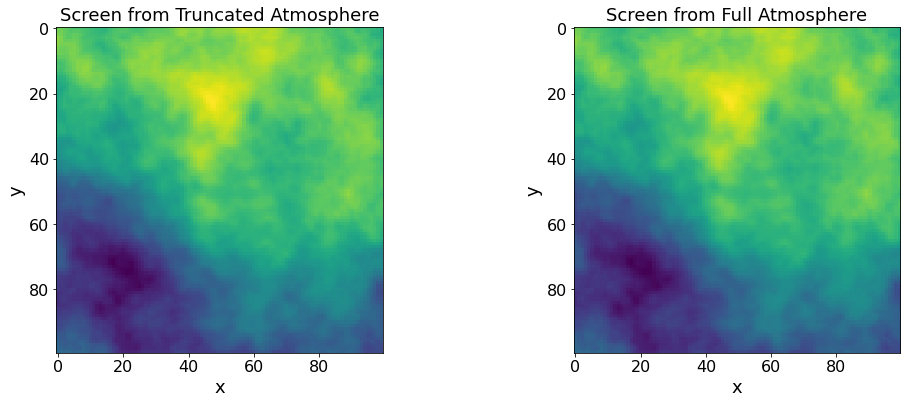

In [5]:
u = np.linspace(-5, 5, 100)
u, v = np.meshgrid(u, u)
truncated_wf = truncated_atm.wavefront(u, v, 0)
full_wf = full_atm.wavefront(u, v, 0)

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
plt.imshow(truncated_wf)
plt.title('Screen from Truncated Atmosphere', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.tick_params(labelsize = 16)


plt.subplot(1,2,2)
plt.imshow(full_wf)
plt.title('Screen from Full Atmosphere', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.ylabel('y', fontsize = 18)